In [1]:
"""
• Long-Only Strategy: For the prediction for each stock on the next day, if the prediction is
positive, we buy the stock at the open price and sell the stock at close price in the same day.
If the prediction is negative, no action is taken.
• Long-Short Strategy: For the prediction for each stock on the next day, if the prediction
is positive, we buy the stock at the open price and sell the stock at close price in the same
day. If the prediction is negative, we short-sell the stock at the open price and close out the
short-sell at the close price.
"""

'\n• Long-Only Strategy: For the prediction for each stock on the next day, if the prediction is\npositive, we buy the stock at the open price and sell the stock at close price in the same day.\nIf the prediction is negative, no action is taken.\n• Long-Short Strategy: For the prediction for each stock on the next day, if the prediction\nis positive, we buy the stock at the open price and sell the stock at close price in the same\nday. If the prediction is negative, we short-sell the stock at the open price and close out the\nshort-sell at the close price.\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model


In [2]:
dataset = pd.read_csv('data/aapl_daily_df.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
dataset.head(5)

,Close,Volume,Market Capitalization,Operating Expenses to Revenue,Operating Cash Flow to CapEx
Date,,,,,
2008-09-29,3.759286,2622057200,6.566631e+10,0.11835,11.616519
2008-09-30,4.059286,1626682400,6.566631e+10,0.11835,11.616519
2008-10-01,3.897143,1296484000,6.566631e+10,0.11835,11.616519
2008-10-02,3.575000,1609364400,6.566631e+10,0.11835,11.616519
2008-10-03,3.466786,2294398400,6.566631e+10,0.11835,11.616519


In [3]:
dataset = dataset.dropna()

In [4]:
#dataset = dataset.drop(dataset.iloc[0],axis=0)
#dataset = dataset.drop(index=['2008-09-30'])
#dataset.head()

In [5]:
dataset.tail()

,Close,Volume,Market Capitalization,Operating Expenses to Revenue,Operating Cash Flow to CapEx
Date,,,,,
2022-06-17,131.559998,134520300,2.287142e+12,0.154402,10.89058
2022-06-21,135.869995,81000500,2.287142e+12,0.154402,10.89058
2022-06-22,135.350006,73409200,2.287142e+12,0.154402,10.89058
2022-06-23,138.270004,72433800,2.287142e+12,0.154402,10.89058
2022-06-24,141.660004,89116800,2.287142e+12,0.154402,10.89058


In [55]:
# We want 80% of the data to be used for training, and 20% for testing
n_train_rows = int(dataset.shape[0]*.8)-1

# Split into train and test sets but keep all 9 columns
train = dataset.iloc[:n_train_rows, :]
test = dataset.iloc[n_train_rows:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(train.shape)
print(test.shape)

(2766, 5)
(693, 5)


In [56]:
# Normalise features
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [57]:
#test_set_scaled[:5]

In [58]:
steps = 10

In [59]:
# Prepare the training data
x_train = []
y_train = []

for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(2746, 10, 5)


In [60]:
# Prepare the test data
x_test = []
y_test = []

for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(683, 10, 5)


In [61]:
model = Sequential()

In [62]:
# Reshape the features for the model
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],5))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],5))

print(f"Reshaped X_train dimensions: {x_train.shape}")

Reshaped X_train dimensions: (2746, 10, 5)


In [63]:
epochs = 100

model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],5)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=5,activation='relu'))

#model.compile(loss="mse",optimizer="adam")
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, batch_size = 32, epochs = epochs)
model.summary


Epoch 1/100
86/86 [==============================] - 10s 38ms/step - loss: 0.0345 - mse: 0.0345
Epoch 2/100
86/86 [==============================] - 3s 39ms/step - loss: 0.0098 - mse: 0.0098
Epoch 3/100
86/86 [==============================] - 3s 39ms/step - loss: 0.0087 - mse: 0.0087
Epoch 4/100
86/86 [==============================] - 3s 40ms/step - loss: 0.0082 - mse: 0.0082
Epoch 5/100
86/86 [==============================] - 3s 38ms/step - loss: 0.0074 - mse: 0.0074
Epoch 6/100
86/86 [==============================] - 3s 39ms/step - loss: 0.0072 - mse: 0.0072
Epoch 7/100
86/86 [==============================] - 3s 38ms/step - loss: 0.0068 - mse: 0.0068
Epoch 8/100
86/86 [==============================] - 3s 40ms/step - loss: 0.0064 - mse: 0.0064
Epoch 9/100
86/86 [==============================] - 3s 36ms/step - loss: 0.0060 - mse: 0.0060
Epoch 10/100
86/86 [==============================] - 3s 39ms/step - loss: 0.0059 - mse: 0.0059
Epoch 11/100
86/86 [============================

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001D764D4ADC0>>

In [64]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
scores = model.evaluate(x_test, y_test)
print('test loss, test acc:', scores)
print('LSTM_accuracy = ', scores[1]*100)
#print('Test accuracy: ', scores[1]*100, '%')


# Evaluate on test data
22/22 [==============================] - 2s 12ms/step - loss: 0.0057 - mse: 0.0057
test loss, test acc: [0.005694047547876835, 0.005694047547876835]
LSTM_accuracy =  0.5694047547876835


In [40]:
# Predict values from test data trained using training data
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

22/22 [==============================] - 2s 13ms/step


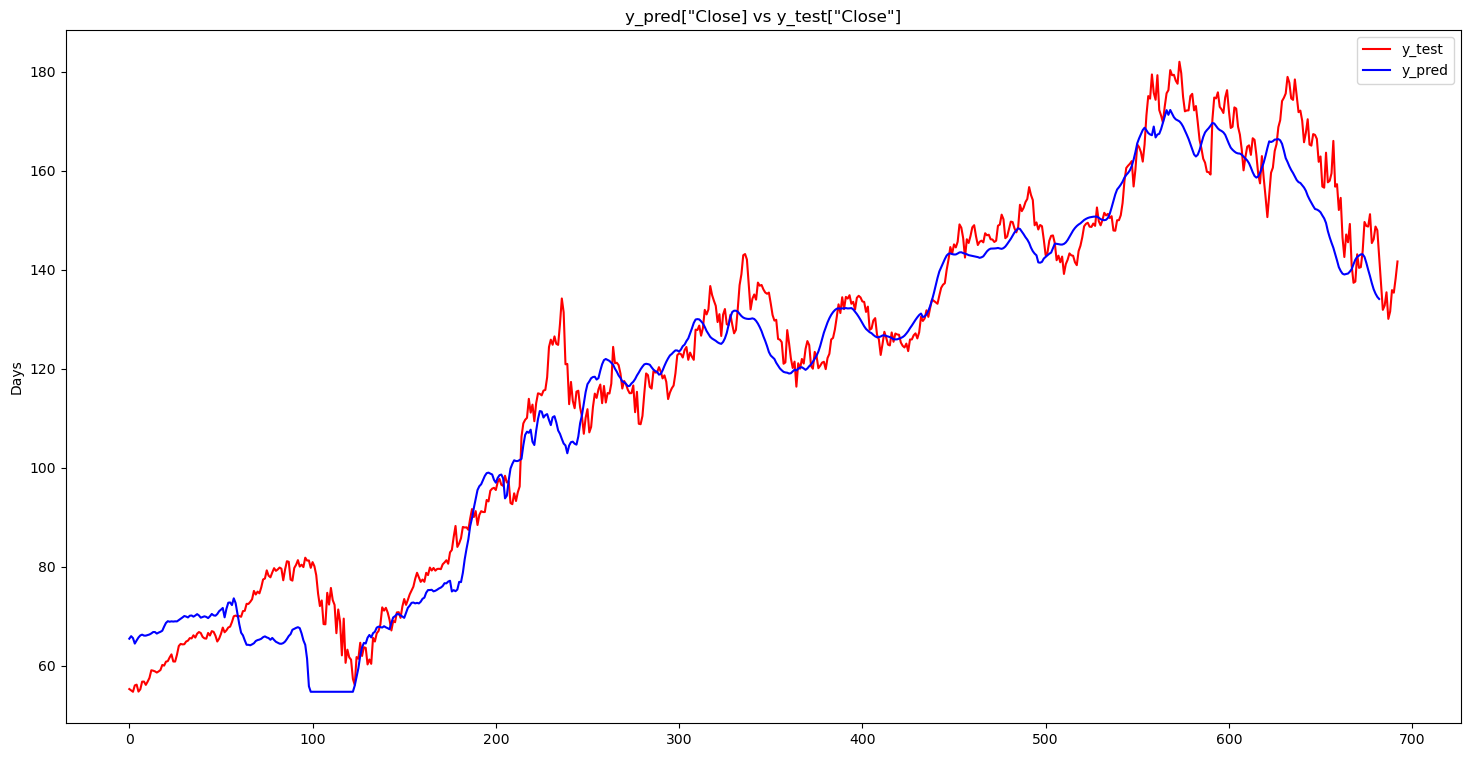

In [41]:
y_test = test.reset_index()

# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,0], color = 'blue', label = 'y_pred')
plt.title('y_pred["Close] vs y_test["Close"]')
plt.ylabel('Close - USD')
plt.ylabel('Days')
plt.legend()
plt.show()
